<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Accessing Databases with SQL Magic

## Objectives

After completing this lab you will be able to:

-   Perform simplified database access using SQL "magic"


##### To communicate with SQL Databases from within a JupyterLab notebook, we can use the SQL "magic" provided by the [ipython-sql](https://github.com/catherinedevlin/ipython-sql) extension. "Magic" is JupyterLab's term for special commands that start with "%". Below, we'll use the _load___ext_ magic to load the ipython-sql extension. In the lab environemnt provided in the course the ipython-sql extension is already installed and so is the ibm_db_sa driver.


In [ ]:
!pip install sqlalchemy==1.3.9
!pip install ibm_db_sa

In [50]:
import sqlalchemy, ibm_db_sa

In [1]:
%load_ext sql

##### Now we have access to SQL magic. With our first SQL magic command, we'll connect to a Db2 database. However, in order to do that, you'll first need to retrieve or create your credentials to access your Db2 database.


<a ><img src = "https://ibm.box.com/shared/static/uy78gy1uq3uj6fkvd4muzy5zcr62tb72.png" width = 1000, align = "center"></a>

  <h5 align=center>  This image shows the location of your connection string if you're using Db2 on IBM Cloud. If you're using another host the format is: username:password@hostname:port/database-name
  </h5>


In [2]:
# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa
%sql ibm_db_sa://mpt95415:nxjxn871h07p-4fw@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB

DB2/LINUXX8664


##### For convenience, we can use %%sql (two %'s instead of one) at the top of a cell to indicate we want the entire cell to be treated as SQL. Let's use this to create a table and fill it with some test data for experimenting.


In [51]:
%%sql

CREATE TABLE erasmus (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);

INSERT INTO ERASMUS_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),


 * ibm_db_sa://mpt95415:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.OperationalError) ibm_db_dbi::OperationalError: Statement Execute Failed: [IBM][CLI Driver] SQL30081N  A communication error has been detected. Communication protocol being used: "TCP/IP".  Communication API being used: "SOCKETS".  Location where the error was detected: "169.44.98.104".  Communication function detecting the error: "send".  Protocol specific error code(s): "10054", "*", "0".  SQLSTATE=08001\r SQLCODE=-30081
[SQL: CREATE TABLE erasmus (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);]
(Background on this error at: http://sqlalche.me/e/e3q8)


#### Using Python Variables in your SQL Statements

##### You can use python variables in your SQL statements by adding a ":" prefix to your python variable names.

##### For example, if I have a python variable `country` with a value of `"Canada"`, I can use this variable in a SQL query to find all the rows of students from Canada.


In [53]:
country = "Poland"
%sql select * from erasmus where country = :country

 * ibm_db_sa://mpt95415:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
Poland,Cole,Winteringham,49
Poland,Julio,Buesden,48
Poland,Auroora,Stiffell,45


#### Assigning the Results of Queries to Python Variables


##### You can use the normal python assignment syntax to assign the results of your queries to python variables.

##### For example, I have a SQL query to retrieve the distribution of test scores (i.e. how many students got each score). I can assign the result of this query to the variable `test_score_distribution` using the `=` operator.


In [59]:
test_score_distribution = %sql SELECT test_score, count(*) from erasmus GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://mpt95415:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


test_score,2
45,1
46,1
48,2
49,2
51,2
53,1
54,1
55,2
57,1
58,1


#### Converting Query Results to DataFrames


##### You can easily convert a SQL query result to a pandas dataframe using the `DataFrame()` method. Dataframe objects are much more versatile than SQL query result objects. For example, we can easily graph our test score distribution after converting to a dataframe.


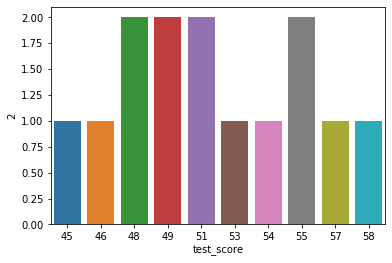

In [61]:
dataframe = test_score_distribution.DataFrame()

%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn
import seaborn

plot = seaborn.barplot(x='test_score',y='2', data=dataframe)

Now you know how to work with Db2 from within JupyterLab notebooks using SQL "magic"!


In [ ]:
%%sql 

-- Feel free to experiment with the data set provided in this notebook for practice:
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;    

# Practice

In [8]:
%%sql

CREATE TABLE erasmus (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);

INSERT INTO erasmus (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45)


 * ibm_db_sa://mpt95415:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.
14 rows affected.


[]

In [14]:
poland_people = %sql select * from erasmus where country = 'Poland'
poland_people = poland_people.DataFrame()
poland_people

 * ibm_db_sa://mpt95415:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


,country,first_name,last_name,test_score
0,Poland,Cole,Winteringham,49
1,Poland,Julio,Buesden,48
2,Poland,Auroora,Stiffell,45


In [31]:
test_score_frequency = %sql SELECT test_score, count(*) as "Frequency" from erasmus group by test_score;
test_score_frequency

 * ibm_db_sa://mpt95415:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


test_score,frequency
45,1
46,1
48,2
49,2
51,2
53,1
54,1
55,2
57,1
58,1


In [32]:
dataframe = test_score_frequency.DataFrame()
dataframe

,test_score,frequency
0,45,1
1,46,1
2,48,2
3,49,2
4,51,2
5,53,1
6,54,1
7,55,2
8,57,1
9,58,1


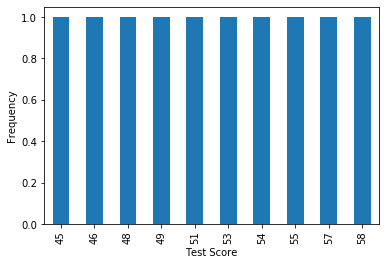

In [46]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

#sb.barplot(x='test_score',y='frequency', data=dataframe)

dataframe.groupby('test_score')['frequency'].nunique().plot(kind='bar')
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.show()
